In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set(style='whitegrid',
        rc={'lines.linewidth': 2.5,
        'figure.figsize': (10, 8),
        'text.usetex': False,
        # 'font.family': 'sans-serif',
        # 'font.sans-serif': 'Optima LT Std',
        })

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from sklearn.metrics import classification_report

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score

filename = 'Traindatawell2.csv'
training_data = pd.read_csv(filename)
training_data

patterns_colors = ['Blue','Yellow','#996633']


patterns_labels = ['Brine sand', 'Oil sand', 'Shale']

correct_Pattern_labels = training_data['LFC'].values

feature_vectors = training_data.drop(['DEPTH','VP', 'VS', 'SW', 'SWX', 'VPVS', 'IP', 'IS', 'VSH', 'RHOm', 'RHOfluid'], axis=1)

feature_vectors.describe()

,Samples,GR,NPHI,RHO,PHI,LFC
count,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,787.500000,73.464612,0.332971,2.207402,0.300210,2.780178
std,454.518977,13.693802,0.058844,0.056621,0.026359,1.426732
min,1.000000,52.300000,0.151000,2.040000,0.143000,1.000000
25%,394.250000,62.900000,0.290000,2.170000,0.286000,1.000000
50%,787.500000,68.300000,0.313000,2.200000,0.302000,4.000000
75%,1180.750000,83.775000,0.365000,2.250000,0.316000,4.000000
max,1574.000000,127.000000,0.534000,2.440000,0.376000,4.000000


In [2]:
def make_logpatterns_log_plot(logs, logpatterns_colors):
    #make sure logs are sorted by samples
    
    logs = logs.sort_values(by='Samples')
    cmap_logpatterns = colors.ListedColormap(
            logpatterns_colors[0:len(logpatterns_colors)], 'indexed')
        
    ztop=logs.Samples.min(); zbot=logs.Samples.max()
                                              
    cluster=np.repeat(np.expand_dims(logs['LFC'].values,1), 100, 1)
                                              
    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(8, 16))
    
    ax[0].plot(logs.GR, logs.Samples, '-', color='blue', linewidth= .3)
    ax[1].plot(logs.NPHI, logs.Samples, '-', color='green', linewidth= .3)
    ax[2].plot(logs.RHO, logs.Samples, '-', color='red', linewidth= .3)
    ax[3].plot(logs.PHI, logs.Samples, '-', color='cyan', linewidth= .3)
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_logpatterns,vmin=1,vmax=3)
    

    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="15%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((80*' ').join(['Brine sand', 'Oil sand', 'Shale']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid(b=False)
        ax[i].locator_params(axis='x', nbins=4)    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("NPHI")
    ax[1].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[2].set_xlabel("RHO")
    ax[2].set_xlim(logs.RHO.min(),logs.RHO.max())
    ax[3].set_xlabel("PHI")
    ax[3].set_xlim(logs.PHI.min(),logs.PHI.max())
    ax[4].set_xlabel('LFC')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    ax[4].set_xticklabels([])
    #plt.savefig("me.png")
    plt.show()
    #help(ax[4].grid)
    #from IPython.display import Image
    #image = Image('me.png')
    #image

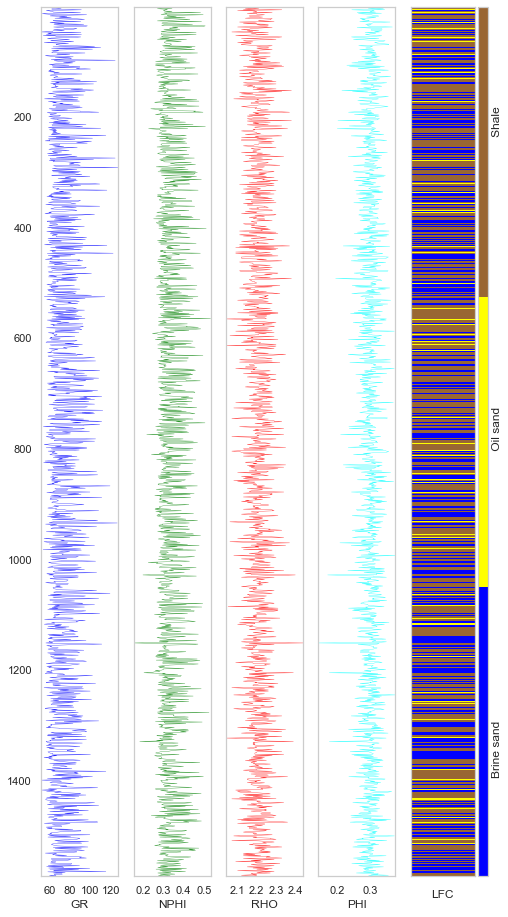

In [3]:
make_logpatterns_log_plot(feature_vectors,patterns_colors)

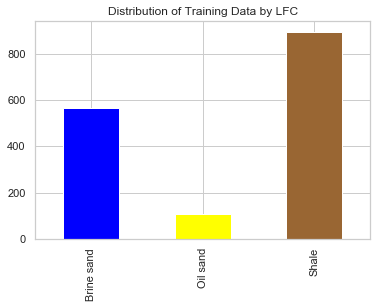

In [4]:
logpatterns_counts = feature_vectors['LFC'].value_counts().sort_index()
#use facies labels to index each count
logpatterns_counts.index = patterns_labels

logpatterns_counts.plot(kind='bar',color=patterns_colors,
                         title='Distribution of Training Data by LFC')
logpatterns_counts
plt.show()

In [5]:
logpatterns_counts

Brine sand    568
Oil sand      108
Shale         898
Name: LFC, dtype: int64

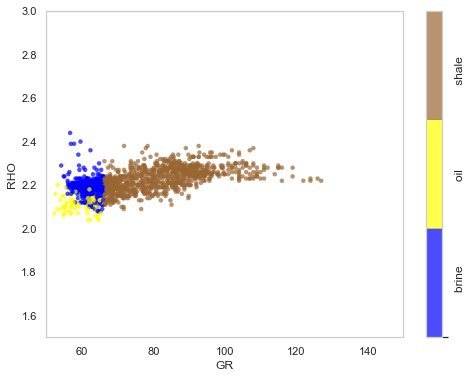

In [6]:
import matplotlib.colors as colors
ccc = ['Blue','Yellow','#996633']
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

plt.figure(figsize=(8,6))

plt.scatter(feature_vectors.GR, feature_vectors.RHO,20, c=feature_vectors.LFC,
            marker='o', edgecolors='none',
            alpha=0.7, cmap=cmap_facies,
            vmin=0, vmax=5)
plt.xlim(50, 150); plt.ylim(1.5, 3);
plt.xlabel('GR'); plt.ylabel('RHO')
plt.grid();

cbar = plt.colorbar()
cbar.set_label((25*' ').join(['brine', 'oil', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

#plt.savefig("crossplot.png", dpi=250)

In [7]:
feature_vectors = feature_vectors.drop(['Samples', 'LFC'], axis=1)

In [8]:
feature_vectors

,GR,NPHI,RHO,PHI
0,73.3,0.345,2.17,0.317
1,75.3,0.330,2.23,0.287
2,62.9,0.269,2.20,0.303
3,71.6,0.342,2.14,0.340
4,62.5,0.269,2.21,0.294
...,...,...,...,...
1569,72.7,0.356,2.18,0.323
1570,64.7,0.284,2.20,0.303
1571,66.5,0.333,2.12,0.355
1572,60.2,0.274,2.20,0.295


In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import scipy               #HAVE TO COMPARE performance BEFORE OPTIMIZATION AND AFTER OPTIMIAZATION
import os                #Use parameter optimization 
%matplotlib inline       
import matplotlib.pyplot as plt

BASE_DIR = ''

Using TensorFlow backend.


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

LR: 0.960279 (0.017040)
LDA: 0.858590 (0.036292)
KNN: 0.954705 (0.018199)


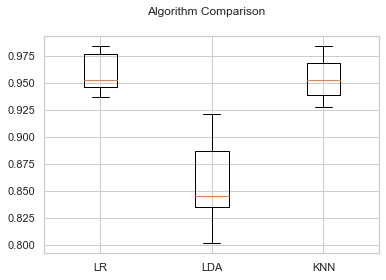

In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)


# Split-out validation dataset
#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, correct_Pattern_labels, test_size=0.2, random_state=42)

# Evaluate Some Algorithms

# Now it is time to create some models of the data and estimate their accuracy on unseen data.

# Here is what we are going to cover in this step:

# Separate out a validation dataset.
# Set-up the test harness to use 10-fold cross validation.
# Select the best model.
# You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

# We will use 10-fold cross validation to estimate accuracy.

# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

# Build Models

# We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

# Let’s evaluate 3 different algorithms:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).


# This is a good mixture of simple linear (LR and LDA), nonlinear (KNN) algorithms.


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('DT', tree.DecisionTreeClassifier()))
#models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
# Make Predictions

# The LR algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

# This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

# We can run the LR model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

# Make predictions on validation dataset

LR = LogisticRegression()

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for seismic_type in os.listdir(folder):
        if not seismic_type.startswith('.'):
            if seismic_type in ['Class1']:
                label = '0'
            else:
                label = '1'
            for image_filename in os.listdir(folder + seismic_type):
                img_file = cv2.imread(folder + seismic_type + '/' + image_filename, 0)
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    # img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


X_train, y_train = get_data(BASE_DIR + 'images/Train/')
X_test, y_test = get_data(BASE_DIR + 'images/Test/')

nsamples, nx, ny = X_train.shape
nsamples2, nx2, ny2 = X_test.shape
X_train_new = X_train.reshape((nsamples,nx*ny))
X_test = X_test.reshape((nsamples2,nx2*ny2))

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


LR.fit(X_train_new, y_train) 
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# We can see that the accuracy is 0.96 or 96%. The confusion matrix provides an indication of the six errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.66
[[21  4]
 [13 12]]
              precision    recall  f1-score   support

           0       0.62      0.84      0.71        25
           1       0.75      0.48      0.59        25

    accuracy                           0.66        50
   macro avg       0.68      0.66      0.65        50
weighted avg       0.68      0.66      0.65        50



In [19]:
#Grid Search
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_LR_acc = GridSearchCV(LR, param_grid = grid_values, scoring = None)
grid_LR_acc.fit(X_train_new, y_train)
#Predict values based on new parameters
y_pred_acc = grid_LR_acc.predict(X_test)
# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc, average = None)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc, average = None)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc, average = None)))
print(confusion_matrix(y_test, y_pred_acc))



C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy Score : 0.68
Precision Score : [0.62857143 0.8       ]
Recall Score : [0.88 0.48]
F1 Score : [0.73333333 0.6       ]
[[22  3]
 [13 12]]


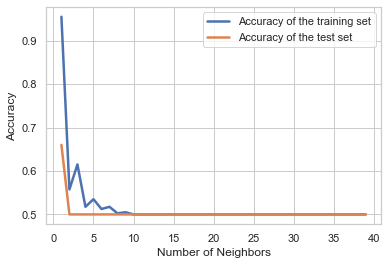

In [14]:
#----------KNN Classifier 
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_new,y_train)
    training_accuracy.append(knn.score(X_train_new, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()
#by looking at plot, best result accurs when n_neighbors is 5-9

In [15]:
print("Accuracy of the training set for 9NN: {:3f}".format(training_accuracy[8]))
print("Accuracy of the test set for 9NN: {:3f}".format(test_accuracy[8]))

Accuracy of the training set for 9NN: 0.505000
Accuracy of the test set for 9NN: 0.500000


In [20]:
log_reg = LogisticRegression(random_state=0, solver='lbfgs',
...                          multi_class='multinomial')
log_reg.fit(X_train_new, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train_new,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy on the training set: 0.938
Accuracy on the test set: 0.580


In [22]:
LDA = LinearDiscriminantAnalysis(solver='svd', 
                                 shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)
LDA.fit(X_train_new,y_train)

print('acc for training data: {:.3f}'.format(LDA.score(X_train_new,y_train)))
print('acc for test data: {:.3f}'.format(LDA.score(X_test,y_test)))

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


acc for training data: 0.955
acc for test data: 0.820


In [23]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_new, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

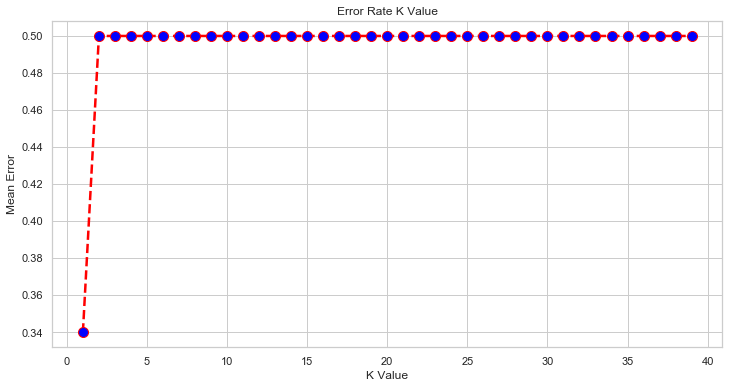

In [24]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

([<matplotlib.axis.XTick at 0x2ba99a62a88>,
 <a list of 5 Text xticklabel objects>)

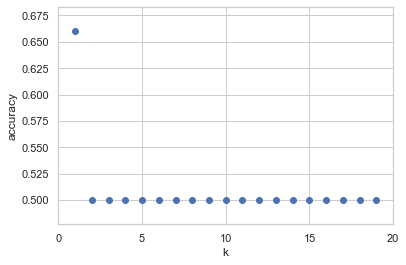

In [25]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_new, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [27]:
knnop = KNeighborsClassifier(n_neighbors=9)
knnop.fit(X_train_new, y_train)
predictionsknn = knnop.predict(X_test)
print(accuracy_score(y_test, predictionsknn))
print(confusion_matrix(y_test, predictionsknn))
print(classification_report(y_test, predictionsknn))


0.5
[[25  0]
 [25  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        25
           1       0.00      0.00      0.00        25

    accuracy                           0.50        50
   macro avg       0.25      0.50      0.33        50
weighted avg       0.25      0.50      0.33        50



C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
